# Automl - Previsão de AVC

![img](https://storage.googleapis.com/kaggle-datasets-images/1120859/1882037/04da2fb7763e553bdf251d5adf6f88d9/dataset-cover.jpg?t=2021-01-26-19-57-05)

# Contexto

Segundo a Organização Mundial da Saúde (OMS), o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer um derrame com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

Informações do atributo
- 1) id: identificador único


- 2) sexo: "Masculino", "Feminino" ou "Outro"


- 3) idade: idade do paciente


- 4) hipertensão: 0 se o paciente não tem hipertensão, 1 se o paciente tem hipertensão


- 5 ) heart_disease: 0 se o paciente não tiver nenhuma doença cardíaca, 1 se o paciente tiver uma doença cardíaca


- 6) ever_married: "Não" ou "Sim"


- 7) work_type: "children", "Govt_jov", "Never_worked", "Particular" ou "Autônomo"


- 8) Residence_type: "Rural" ou "Urbana"


- 9) avg_glucose_level: nível médio de glicose no sangue


- 10) IMC: índice de massa corporal


- 11) smoking_status: "ex-fumante", "nunca fumou", "fuma"ou "Desconhecido"*


- 12) AVC: 1 se o paciente teve AVC ou 0 se não

**Observação: "Desconhecido" em smoking_status significa que as informações não estão disponíveis para este paciente**

In [6]:
# Instalando pacote
!pip install watermark
!pip install seaborn
!pip install pandas
!pip install pycaret

  Using cached watermark-2.3.1-py2.py3-none-any.whl (7.2 kB)


In [9]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca AutoML Pycaret
from pycaret.classification import *

# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

# Versões dos pacotes usados neste jupyter notebook
#%reload_ext watermark
#%watermark -a "Verções bibliotecas" --iversions

import warnings
warnings.filterwarnings("ignore")

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.15


# Base dados

In [2]:
# Base geral
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
# Visualizando os 5 primeiros dados
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
# Visualizando os 5 últimos dados
data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [12]:
# Visualizando linhas e colunas
data.shape

(5110, 12)

In [13]:
# Informações dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
# Tipo dados
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [15]:
# Amostra simples 5 
data.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
829,26999,Male,61.0,1,1,Yes,Govt_job,Rural,86.06,34.8,never smoked,0
1344,67309,Male,47.0,0,0,Yes,Private,Rural,86.37,39.2,smokes,0
2330,32365,Male,42.0,0,0,Yes,Private,Rural,89.22,53.8,Unknown,0
5050,15581,Male,5.0,0,0,No,children,Urban,101.87,19.3,Unknown,0
86,3253,Male,61.0,0,1,Yes,Private,Rural,111.81,27.3,smokes,1


In [19]:
# Colunas númericas
nub = ["hypertension", 
       "heart_disease", 
       "avg_glucose_level", 
       "bmi"]

# Coluna categorica
cat = ["gender", 
       "ever_married", 
       "work_type", 
       "Residence_type", 
       "smoking_status"]

# Coluna target
target = ["stroke"]

In [18]:
# Variavel target
target = ["stroke"]

In [17]:
# Total
data["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Explorando as variáveis númericas

In [20]:
# Resumo variáveis numéricas
data[nub].describe()

,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,0.097456,0.054012,106.147677,28.893237
std,0.296607,0.226063,45.283560,7.854067
min,0.000000,0.000000,55.120000,10.300000
25%,0.000000,0.000000,77.245000,23.500000
50%,0.000000,0.000000,91.885000,28.100000
75%,0.000000,0.000000,114.090000,33.100000
max,1.000000,1.000000,271.740000,97.600000


In [58]:
# Listando o total por categoria de cada variável categórica
for col in cat:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(data[col].value_counts())
    print()

Total de Registros Por Categoria da Variável gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Total de Registros Por Categoria da Variável ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

Total de Registros Por Categoria da Variável work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Total de Registros Por Categoria da Variável Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Total de Registros Por Categoria da Variável smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



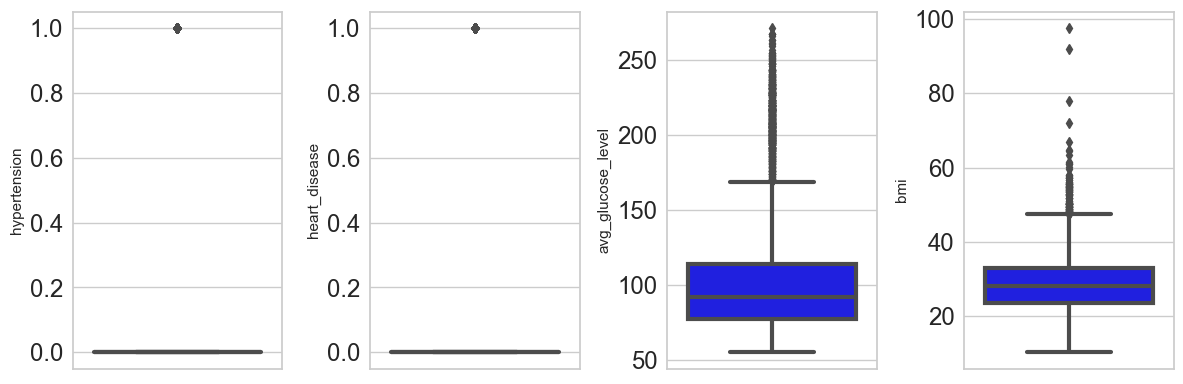

In [61]:
features = nub
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = data[features[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

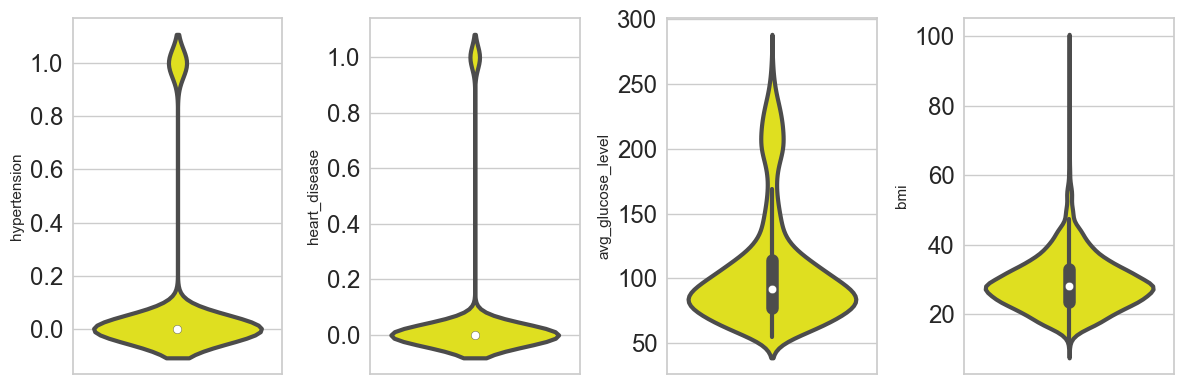

In [67]:
for i in range(0, len(nub)):
    plt.subplot(1, len(nub), i+1)
    sns.violinplot(y = data[nub[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

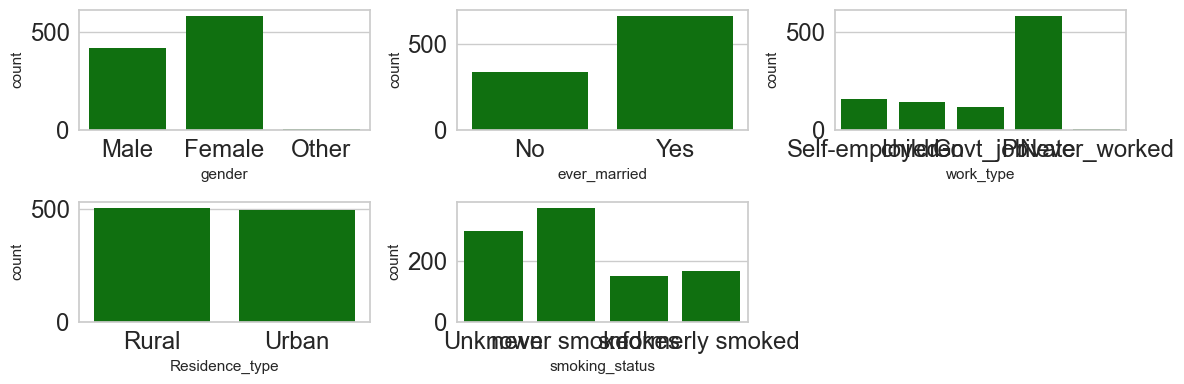

In [71]:
df_sample = data.sample(1000, random_state = 42)
for i in range(0, len(cat)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cat[i]], color = 'green', orient = 'v')
    plt.tight_layout()

<AxesSubplot: xlabel='stroke', ylabel='count'>

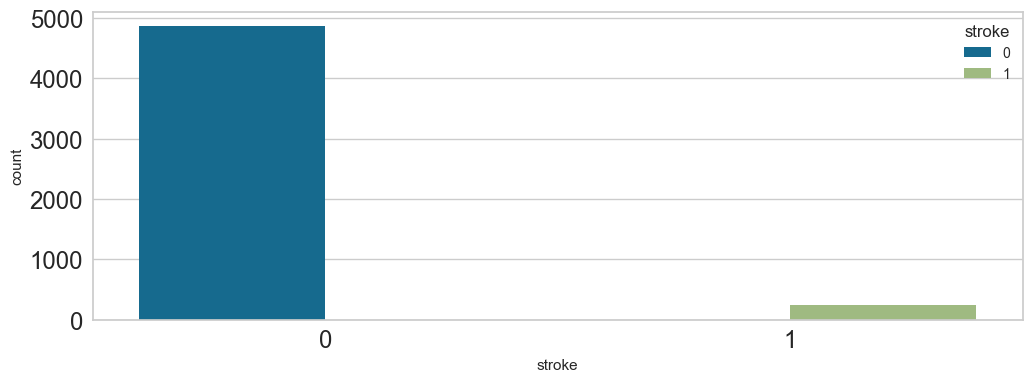

In [73]:
# Count Plot da variável target
sns.countplot(data = data, x = data['stroke'], hue = 'stroke')

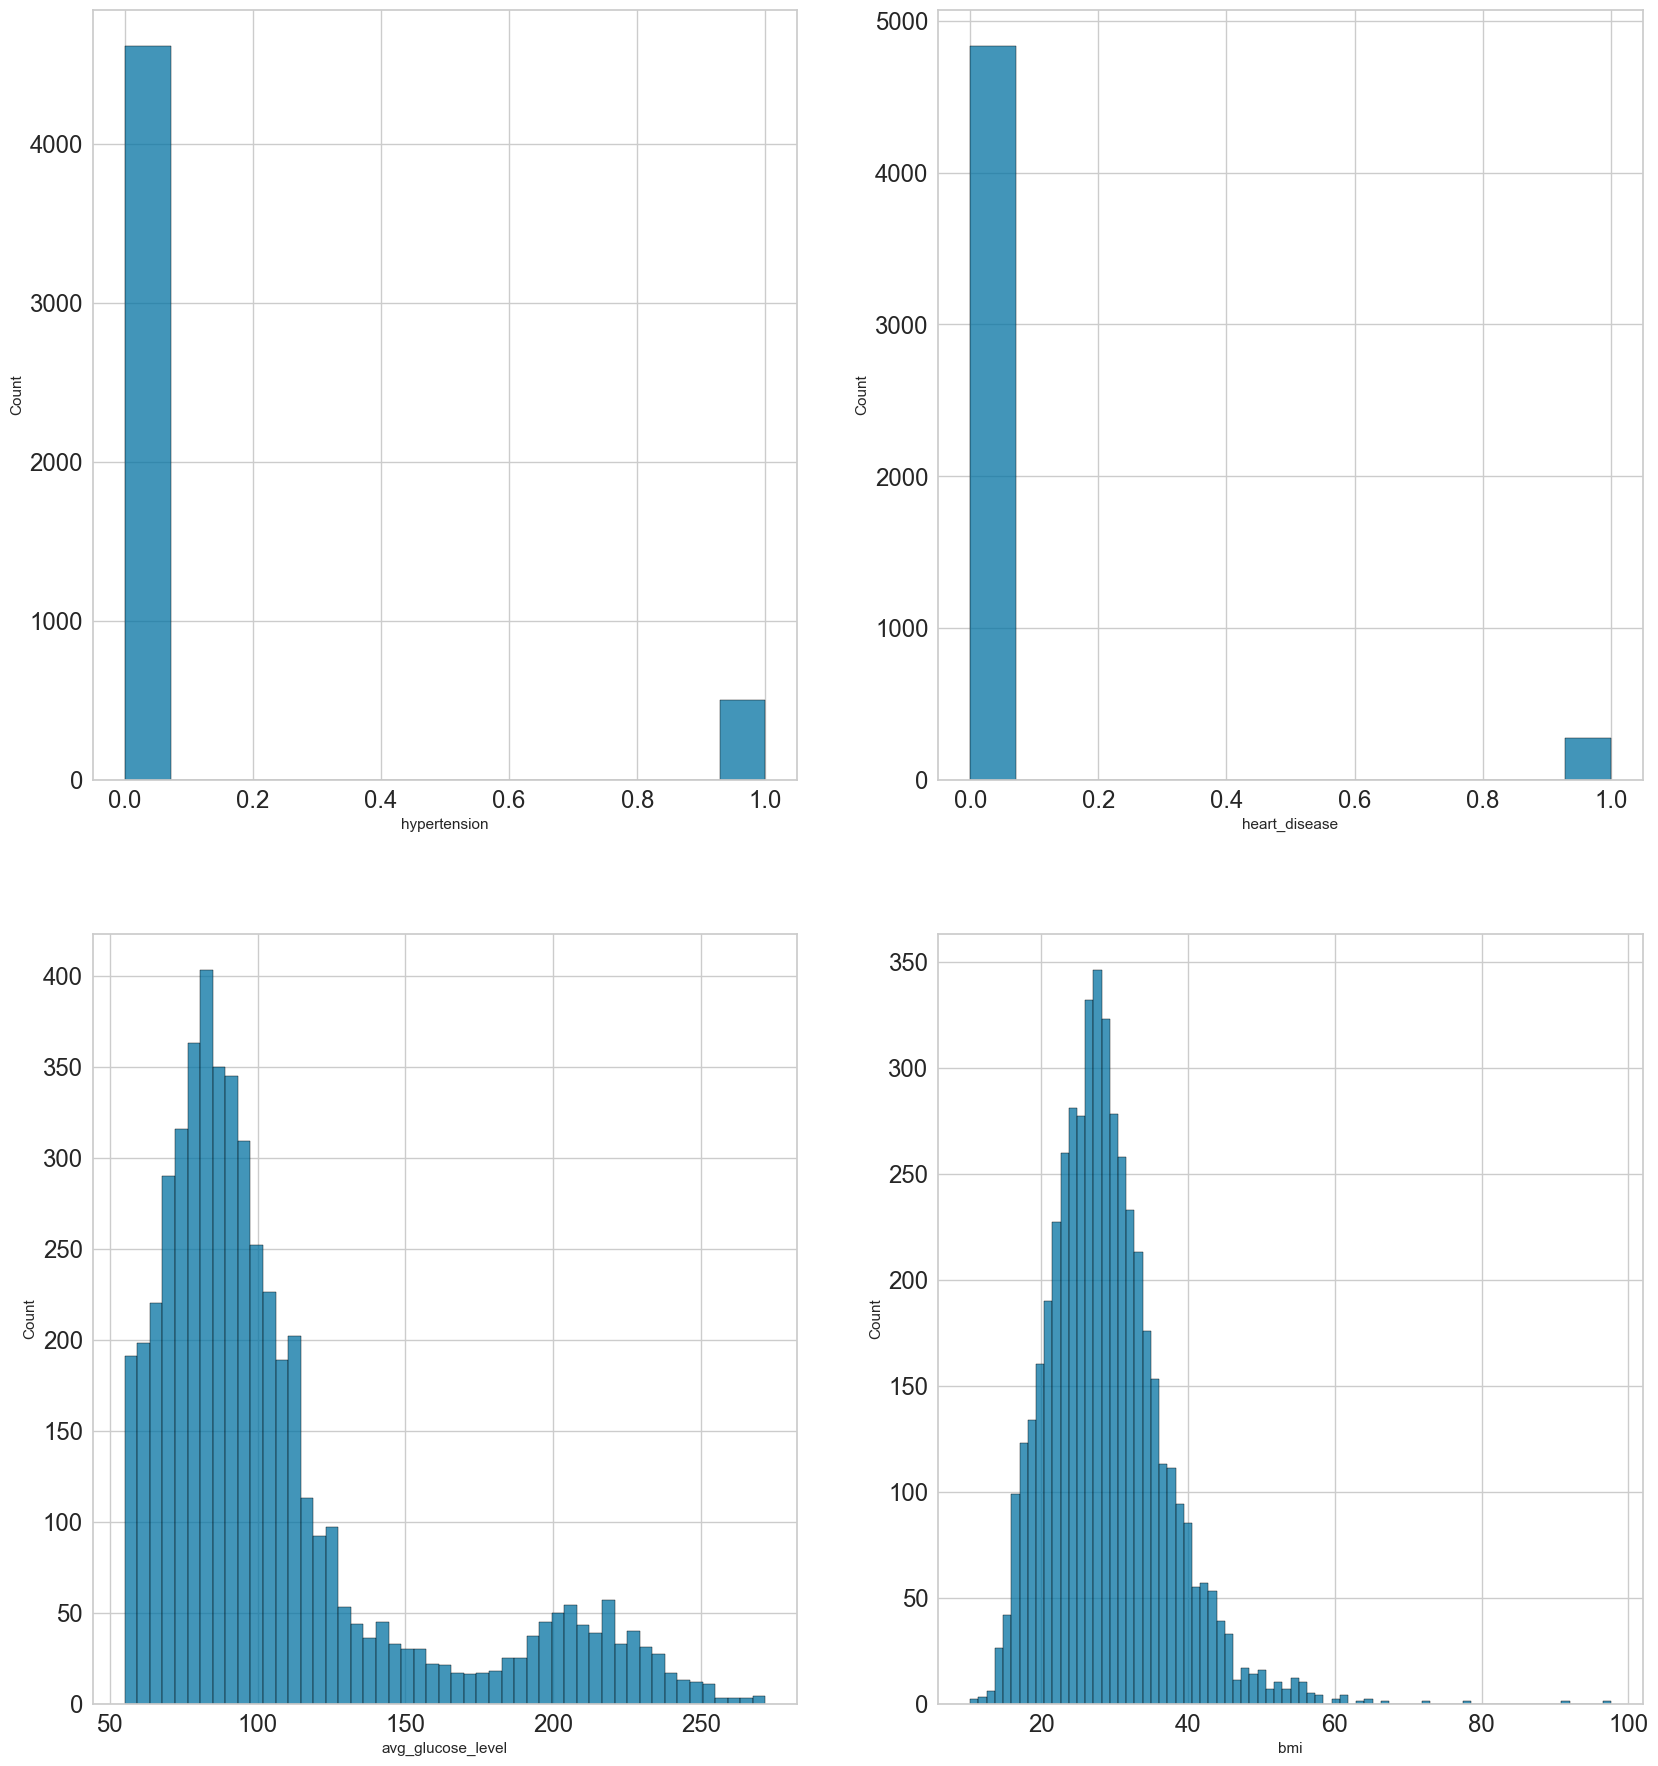

In [76]:
# Gráfico subplot com as variaveis númericas
fig , axes = plt.subplots(nrows=2 , ncols=2 , figsize = (20, 22))

ax = sns.histplot(data["hypertension"] , ax=axes[0,0])
ax = sns.histplot(data["heart_disease"] ,  ax=axes[0,1])
ax = sns.histplot(data["avg_glucose_level"] , ax=axes[1,0])
ax = sns.histplot(data["bmi"], ax=axes[1,1] )

plt.show()

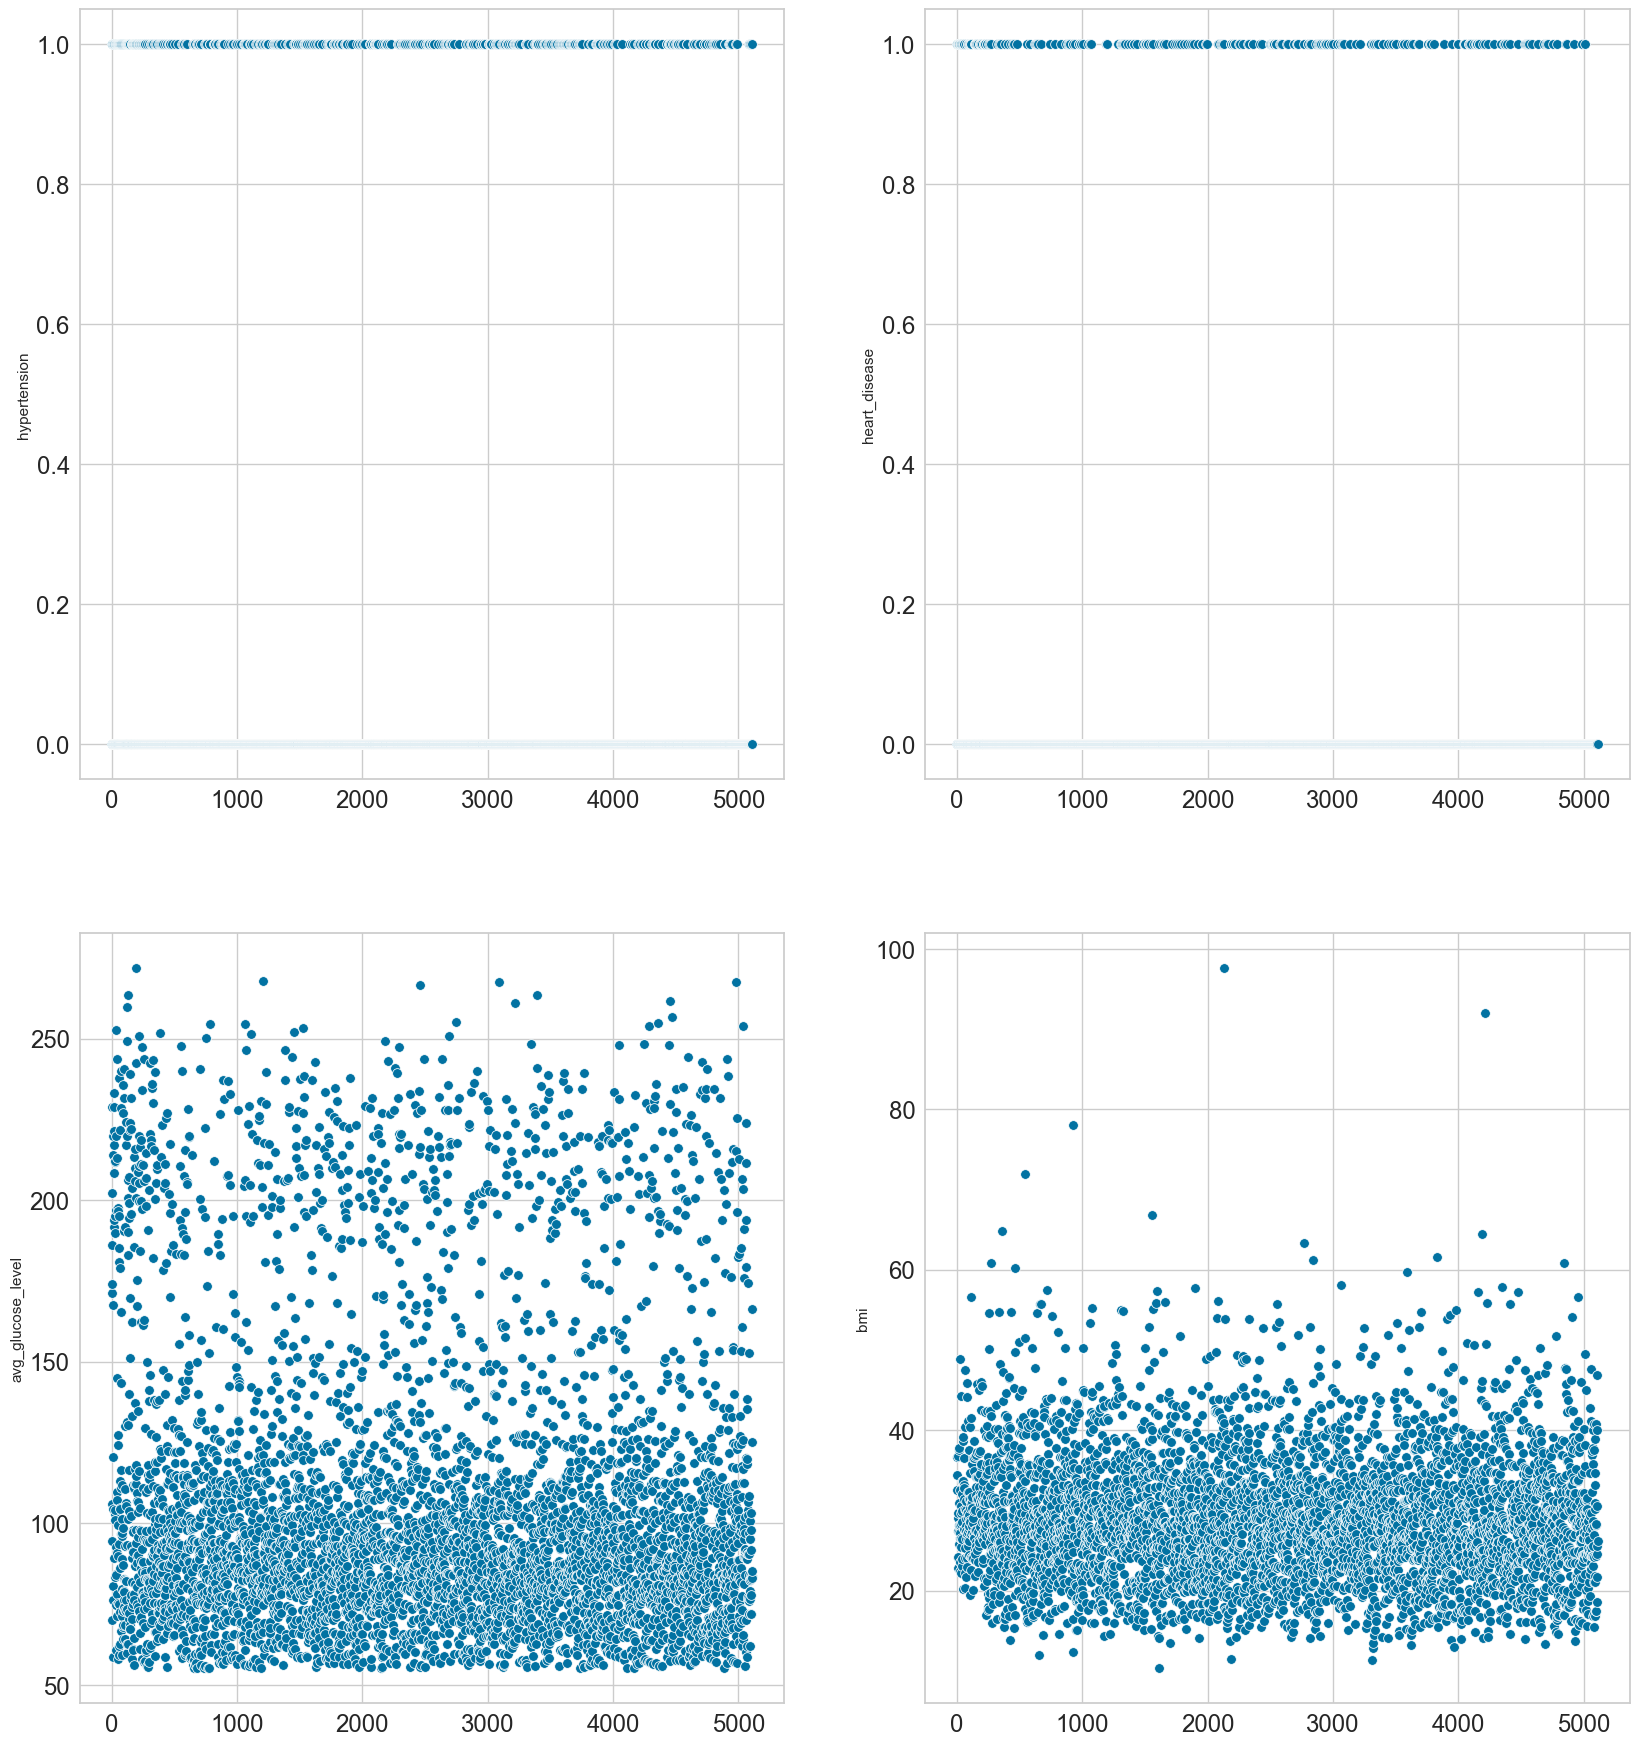

In [77]:
# Gráfico subplot com as variaveis númericas 2
fig , axes = plt.subplots(nrows=2 , ncols=2 , figsize = (20, 22))

ax = sns.scatterplot(data["hypertension"] , ax=axes[0,0])
ax = sns.scatterplot(data["heart_disease"] ,  ax=axes[0,1])
ax = sns.scatterplot(data["avg_glucose_level"] , ax=axes[1,0])
ax = sns.scatterplot(data["bmi"], ax=axes[1,1] )

plt.show()

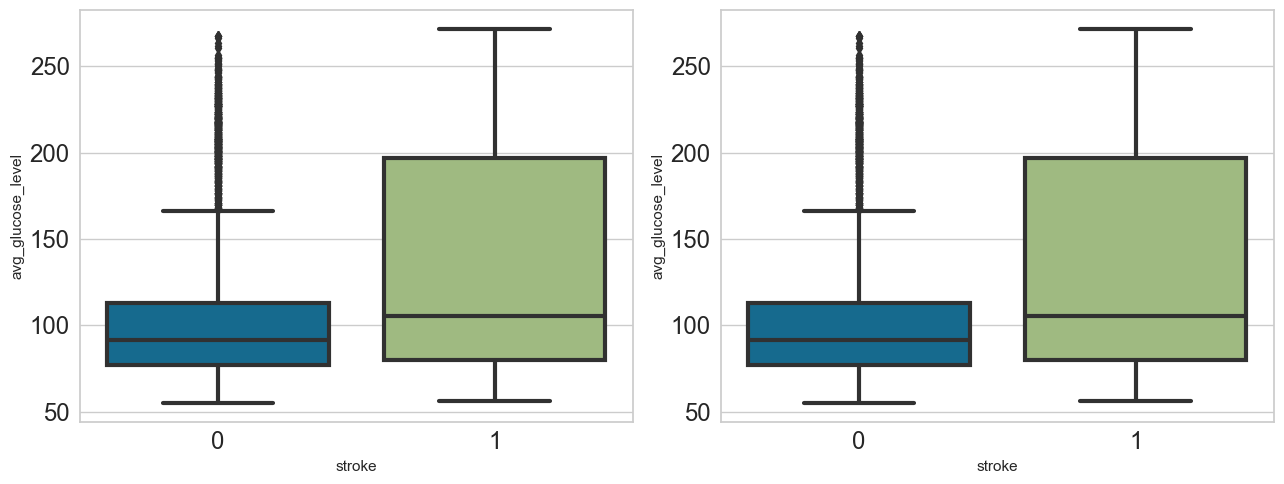

In [50]:
# Gráfico subplot com boxplot com a variavel target 
fig,ax = plt.subplots(1,2,figsize=(13,5))

sns.boxplot(y=data['avg_glucose_level'],x=data['stroke'],ax=ax[0])
sns.boxplot(y=data['avg_glucose_level'],x=data['stroke'],ax=ax[1])
plt.tight_layout()

# Colunas Categóricas x Variável Target

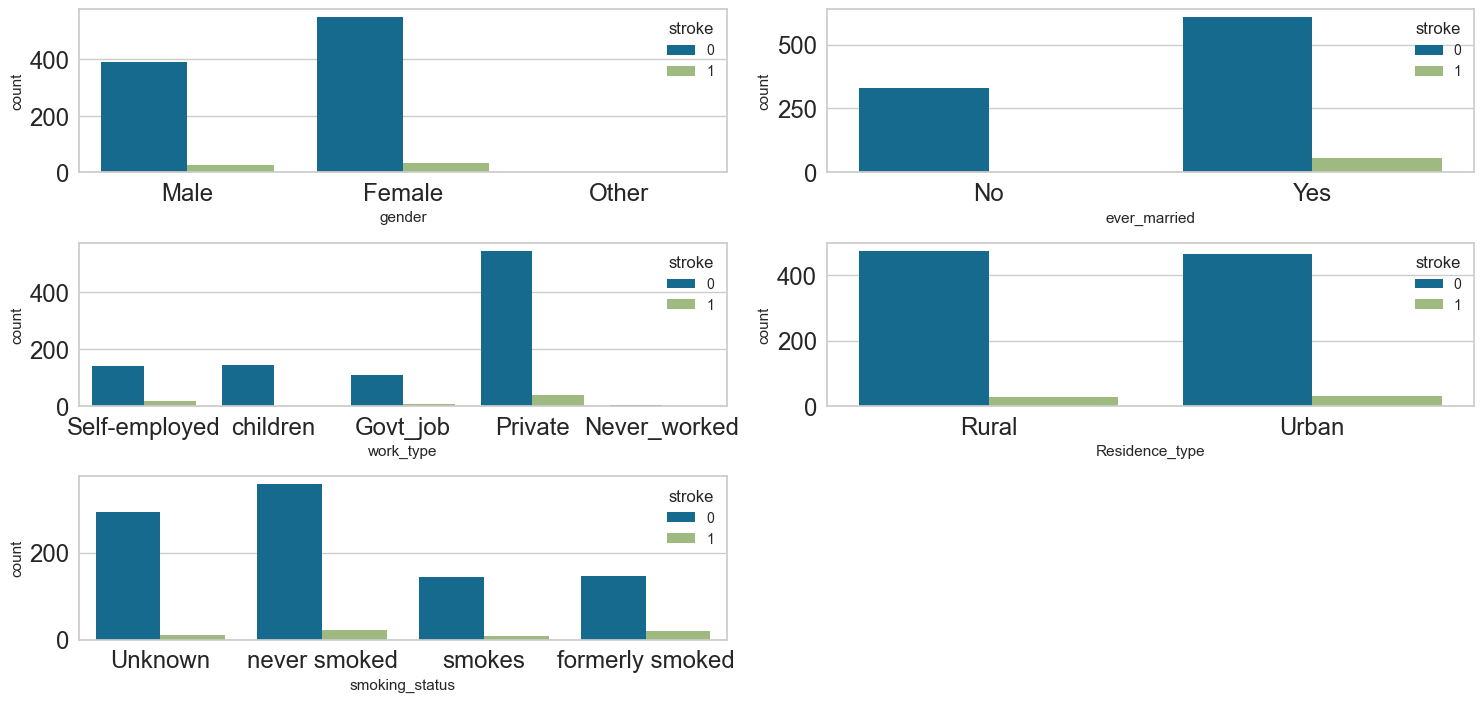

In [92]:
# Colunas Categóricas x Variável Target
plt.figure(figsize = (15, 9))
features = cat
for i in range(0, len(features)):
    plt.subplot(4, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'stroke')
    plt.tight_layout()

### Análise Bivariada - Mapa de Correlação

In [81]:
# Correlação dados da coluna númerica
data[nub].corr()

,hypertension,heart_disease,avg_glucose_level,bmi
hypertension,1.000000,0.108306,0.174474,0.167811
heart_disease,0.108306,1.000000,0.161857,0.041357
avg_glucose_level,0.174474,0.161857,1.000000,0.175502
bmi,0.167811,0.041357,0.175502,1.000000


In [82]:
# Correlação dados da coluna númerica
corr_df = data[nub].corr()
corr_df

,hypertension,heart_disease,avg_glucose_level,bmi
hypertension,1.000000,0.108306,0.174474,0.167811
heart_disease,0.108306,1.000000,0.161857,0.041357
avg_glucose_level,0.174474,0.161857,1.000000,0.175502
bmi,0.167811,0.041357,0.175502,1.000000


<AxesSubplot: >

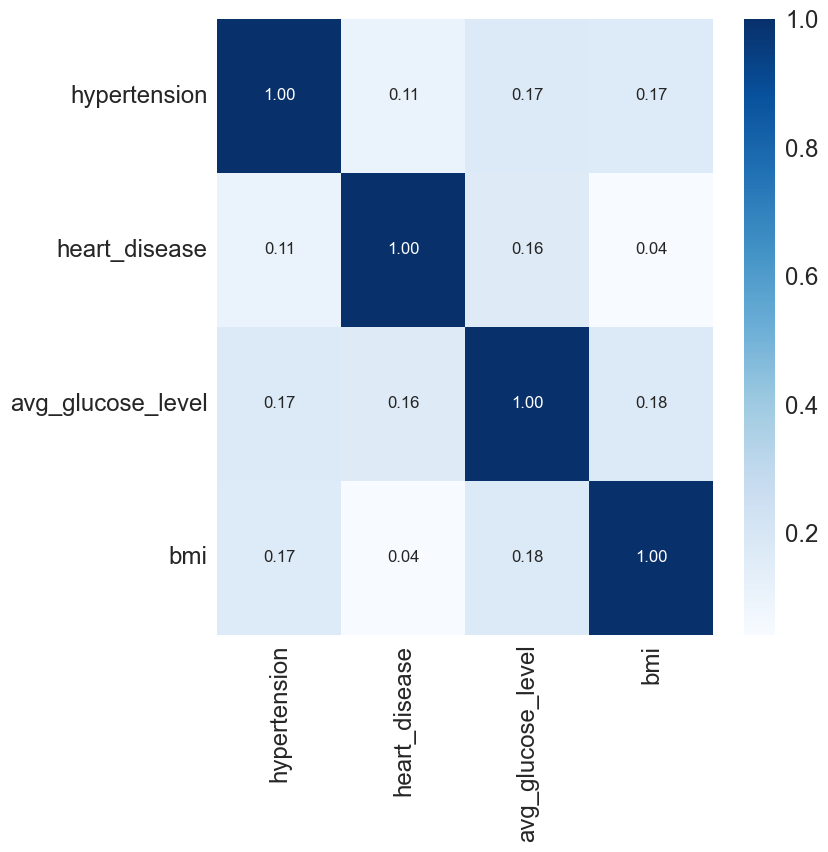

In [83]:
# Gráfico correlação colunas númerica
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

### Análise Bivariada - Pair Plot

<Figure size 1500x1500 with 0 Axes>

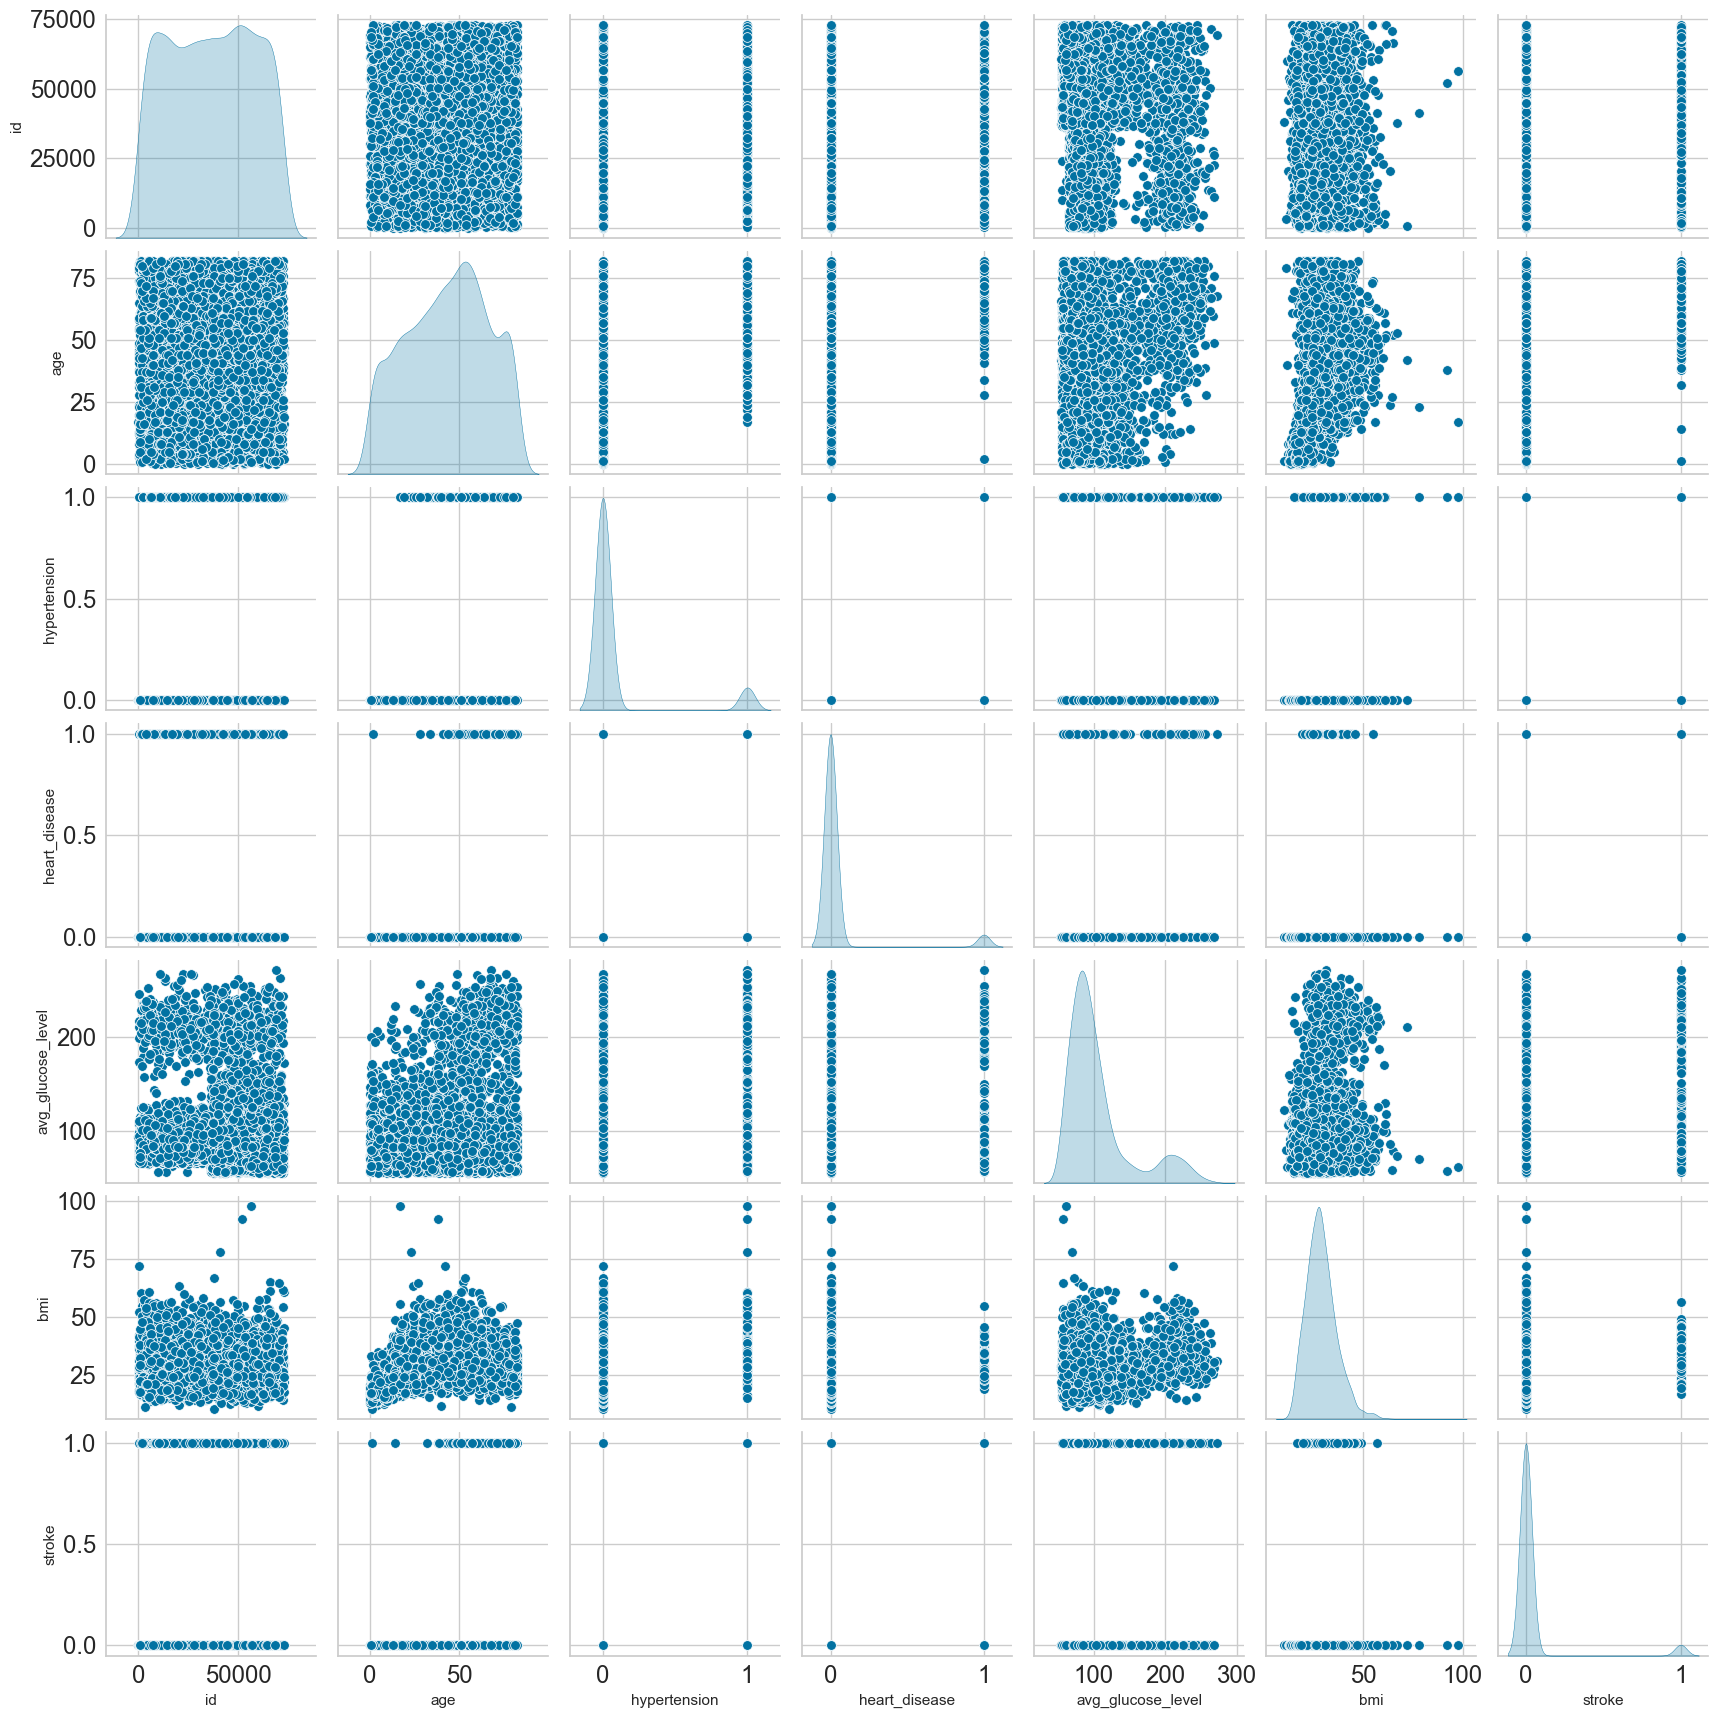

In [86]:
# Pair plot geral
plt.figure(figsize = (15, 15))
sns.pairplot(data, diag_kind = 'kde')

<Figure size 1500x1500 with 0 Axes>

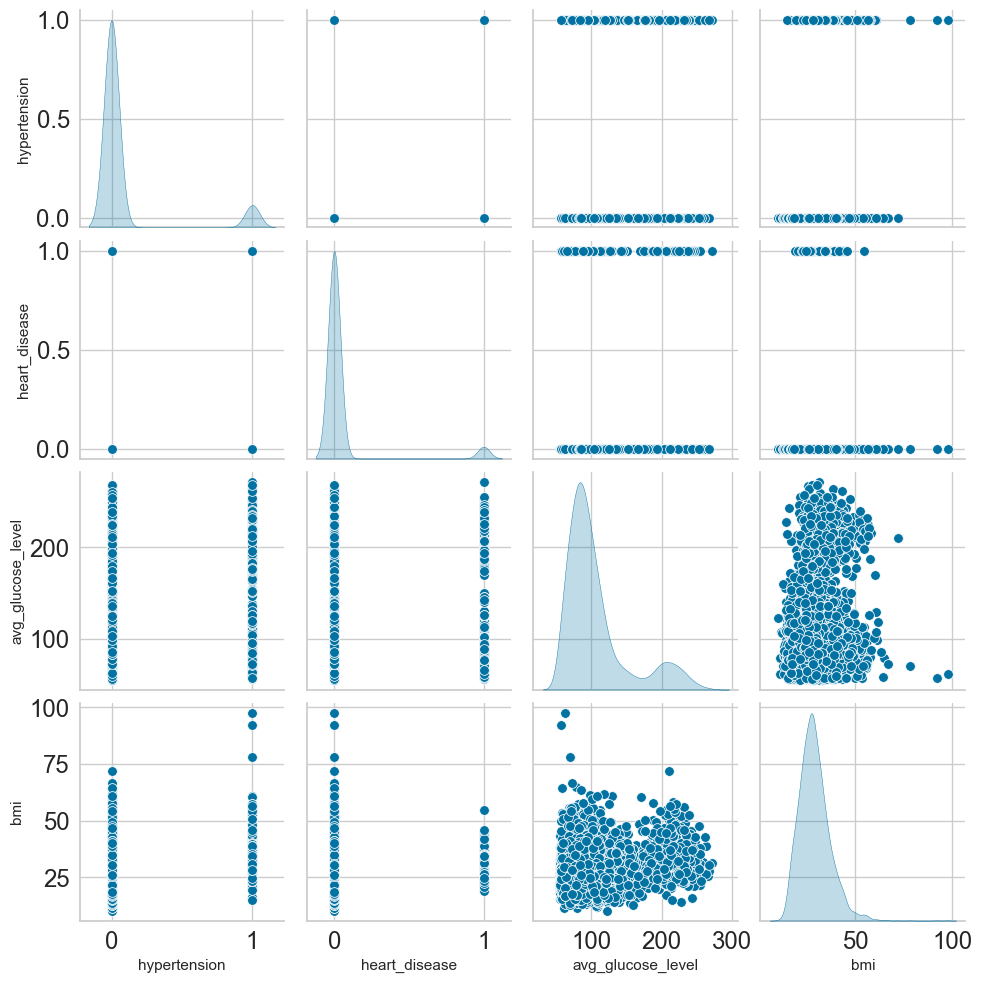

In [85]:
# Pair plot geral variaveis númericas
plt.figure(figsize = (15, 15))
sns.pairplot(data[nub], diag_kind = 'kde')

# Modelo AutoML

In [94]:
# Nessa função ele cria o pipeline transformação modelo 
# Segunda parte setup deve ser chamada antes de executar para função.

# Model
# Raiz da base dados
model = setup(data = data,

# Features target
target = "stroke",

# Os valores ausentes em recursos numéricos são imputados com o valor 'médio' do recurso no conjunto de dados de treinamento. 
# A outra opção disponível é 'mediana' ou 'zero'.
numeric_imputation = 'mean',

# Controla a entrada de confirmação de tipos de dados quando setupé executado. 
# Ao executar em modo totalmente automatizado ou em um kernel remoto, deve ser True.
 silent = True)

,Description,Value
0,session_id,7591
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5110, 12)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [95]:
# Essa função treina e avalia o desempenho de todos os estimadores disponíveis na biblioteca de modelos usando validação cruzada. 
# A saída dessa função é uma grade de pontuação com pontuações médias de validação cruzada. 
# As métricas avaliadas durante o CV podem ser acessadas usando a função get_metrics. 
# As métricas personalizadas podem ser adicionadas ou removidas usando as funções add_metric e remove_metric.
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9530,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0150
dummy,Dummy Classifier,0.9530,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060
rf,Random Forest Classifier,0.9522,0.8083,0.0000,0.0000,0.0000,-0.0016,-0.0035,0.1890
knn,K Neighbors Classifier,0.9519,0.5380,0.0000,0.0000,0.0000,-0.0021,-0.0047,0.0390
et,Extra Trees Classifier,0.9513,0.7668,0.0121,0.2000,0.0229,0.0177,0.0394,0.1360
lr,Logistic Regression,0.9508,0.7423,0.0059,0.1000,0.0111,0.0060,0.0152,2.3450
ada,Ada Boost Classifier,0.9505,0.8230,0.0176,0.1083,0.0301,0.0231,0.0328,0.0800
gbc,Gradient Boosting Classifier,0.9491,0.8375,0.0360,0.2167,0.0611,0.0493,0.0711,0.1820
lda,Linear Discriminant Analysis,0.9480,0.8407,0.0415,0.2658,0.0683,0.0550,0.0832,0.0500
lightgbm,Light Gradient Boosting Machine,0.9469,0.8296,0.0419,0.1700,0.0665,0.0513,0.0643,0.0490


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=7591,
                solver='auto', tol=0.001)

In [96]:
# Modelo Ridge Classifier
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9525,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9525,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9525,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9525,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9525,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9525,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9552,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9552,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9524,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [97]:
# # Modelo regressão logistica
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9525,0.6659,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9469,0.6798,0.0000,0.0000,0.0000,-0.0101,-0.0167
2,0.9525,0.7637,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9497,0.8094,0.0000,0.0000,0.0000,-0.0053,-0.0118
4,0.9525,0.8292,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9469,0.8058,0.0000,0.0000,0.0000,-0.0101,-0.0167
6,0.9524,0.7425,0.0000,0.0000,0.0000,-0.0053,-0.0115
7,0.9524,0.6252,0.0000,0.0000,0.0000,-0.0053,-0.0115
8,0.9552,0.7453,0.0588,1.0000,0.1111,0.1064,0.2370


In [98]:
# Modelo Random Forest Classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9525,0.8034,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9525,0.7328,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9497,0.8162,0.0000,0.0000,0.0000,-0.0053,-0.0118
3,0.9525,0.8772,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9497,0.8061,0.0000,0.0000,0.0000,-0.0053,-0.0118
5,0.9525,0.8134,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9552,0.7938,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9552,0.8088,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9496,0.8161,0.0000,0.0000,0.0000,-0.0053,-0.0119


In [101]:
# Tuned logistic regression
Tuned_Logistic_Regression = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9525,0.6659,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9525,0.7318,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9525,0.7637,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9497,0.8094,0.0000,0.0000,0.0000,-0.0053,-0.0118
4,0.9469,0.7761,0.0000,0.0000,0.0000,-0.0101,-0.0167
5,0.9525,0.7456,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9524,0.7425,0.0000,0.0000,0.0000,-0.0053,-0.0115
7,0.9524,0.6252,0.0000,0.0000,0.0000,-0.0053,-0.0115
8,0.9552,0.7453,0.0588,1.0000,0.1111,0.1064,0.2370


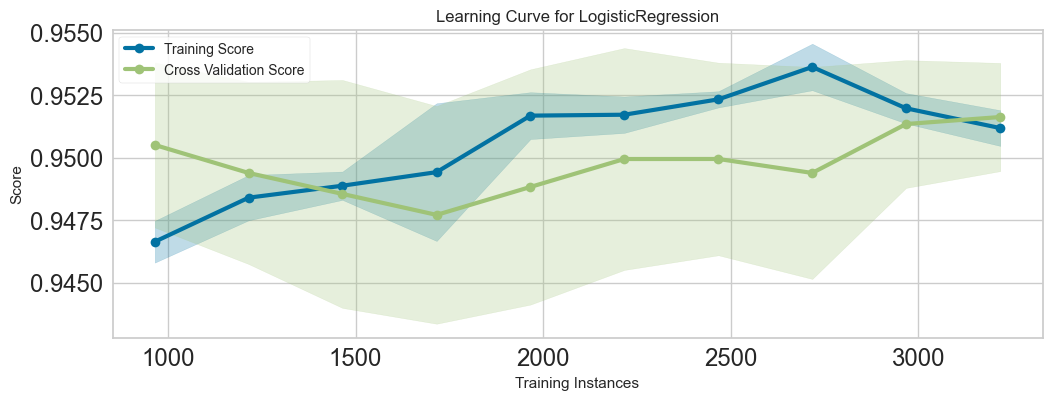

In [102]:
# Plot Tuned logistic regression
plot_model(estimator = Tuned_Logistic_Regression, plot = 'learning')

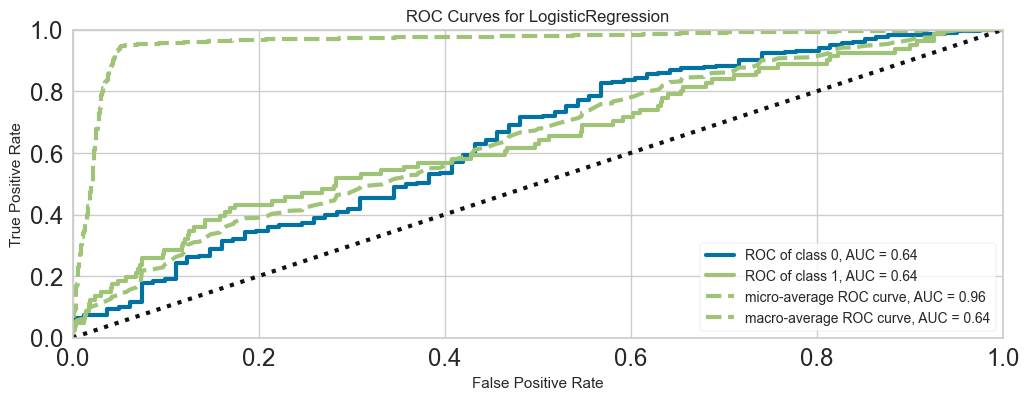

In [103]:
# Plot Tuned logistic regression - ROC
plot_model(estimator = Tuned_Logistic_Regression, plot = 'auc')

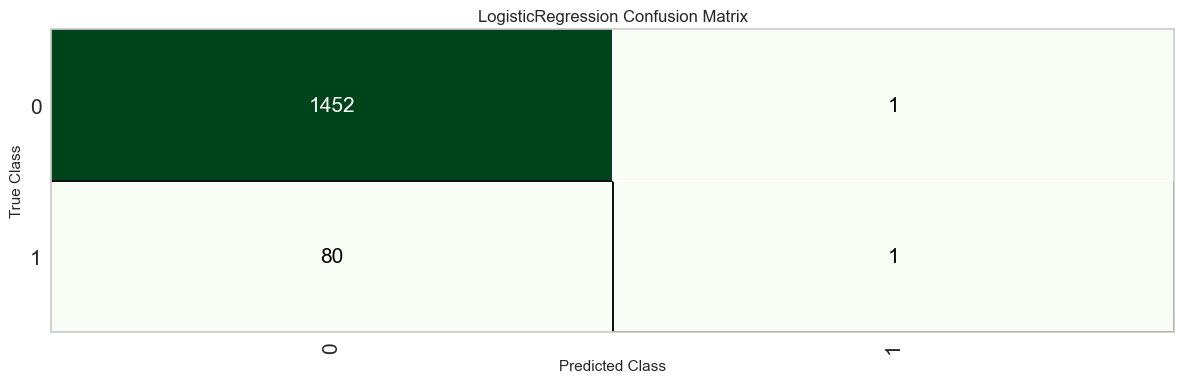

In [104]:
# Plot Tuned logistic regression - Confusion matrix
plot_model(estimator = Tuned_Logistic_Regression, plot = 'confusion_matrix')

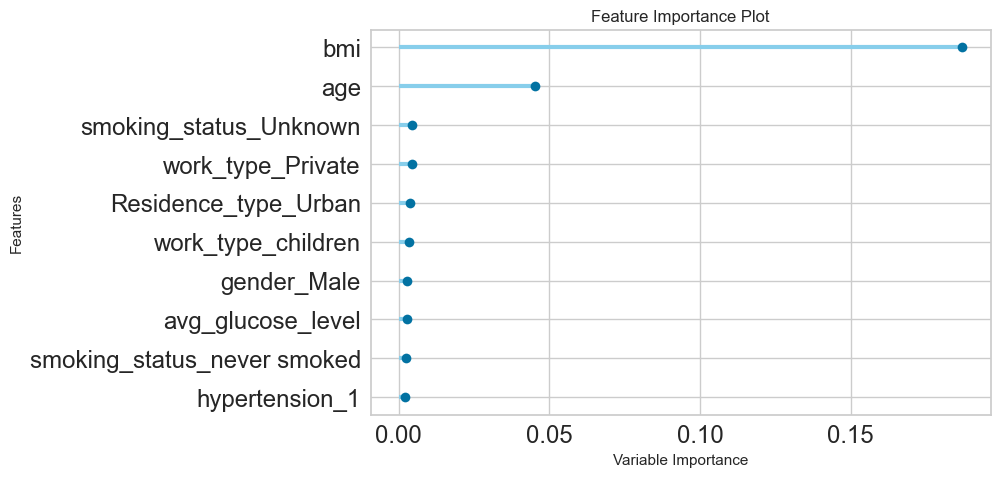

In [105]:
# Plot Tuned logistic regression - feature
plot_model( estimator = Tuned_Logistic_Regression, plot = 'feature')

In [107]:
# Evaluate model
evaluate_model(Tuned_Logistic_Regression)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Modelo 02 - AutoML

In [110]:
# Modelo automl 2
model = setup(data, 
             target = "stroke",
             session_id = 123, 
             log_experiment = True, 
             numeric_imputation = 'mean',
             silent = True)

,Description,Value
0,session_id,123
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5110, 12)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


2023/01/16 16:25:08 INFO mlflow.tracking.fluent: Experiment with name 'clf-default-name' does not exist. Creating a new experiment.


In [111]:
# Modelos melhores
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9494,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0100
dummy,Dummy Classifier,0.9494,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070
rf,Random Forest Classifier,0.9491,0.7984,0.0000,0.0000,0.0000,-0.0005,-0.0012,0.2170
knn,K Neighbors Classifier,0.9488,0.5157,0.0000,0.0000,0.0000,-0.0011,-0.0024,0.0600
lr,Logistic Regression,0.9477,0.7149,0.0056,0.0500,0.0100,0.0059,0.0088,0.0280
ada,Ada Boost Classifier,0.9469,0.8269,0.0275,0.2250,0.0477,0.0390,0.0626,0.1210
et,Extra Trees Classifier,0.9463,0.7804,0.0167,0.2000,0.0305,0.0222,0.0436,0.2250
gbc,Gradient Boosting Classifier,0.9452,0.8384,0.0000,0.0000,0.0000,-0.0077,-0.0139,0.2090
lightgbm,Light Gradient Boosting Machine,0.9446,0.8225,0.0275,0.1700,0.0468,0.0345,0.0507,0.0490
lda,Linear Discriminant Analysis,0.9399,0.8427,0.0769,0.2570,0.1152,0.0921,0.1121,0.0140


In [112]:
# Modelo Ridge Classifier
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9497,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9497,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9497,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9497,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9497,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9469,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9496,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9496,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9496,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [113]:
# Modelo Logistic Regression
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9497,0.7964,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9497,0.7276,0.0556,0.5000,0.1000,0.0909,0.1543
2,0.9469,0.6907,0.0000,0.0000,0.0000,-0.0053,-0.0122
3,0.9469,0.6891,0.0000,0.0000,0.0000,-0.0053,-0.0122
4,0.9497,0.7788,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9469,0.6900,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9468,0.8083,0.0000,0.0000,0.0000,-0.0053,-0.0122
7,0.9440,0.5659,0.0000,0.0000,0.0000,-0.0102,-0.0173
8,0.9496,0.7453,0.0000,0.0000,0.0000,0.0000,0.0000


In [114]:
# Tuned dos modelos

model_tuned_ridge = tune_model(ridge)
model_tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9469,0.7879,0.0000,0.0000,0.0000,-0.0053,-0.0122
1,0.9497,0.7276,0.0556,0.5000,0.1000,0.0909,0.1543
2,0.9469,0.6907,0.0000,0.0000,0.0000,-0.0053,-0.0122
3,0.9469,0.6891,0.0000,0.0000,0.0000,-0.0053,-0.0122
4,0.9497,0.7788,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9469,0.6900,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9496,0.6867,0.0556,0.5000,0.1000,0.0908,0.1542
7,0.9440,0.5659,0.0000,0.0000,0.0000,-0.0102,-0.0173
8,0.9496,0.8029,0.0000,0.0000,0.0000,0.0000,0.0000


In [116]:
# Previsão do modelo Ridge Classifier
model_pred_ridge = predict_model(ridge)
model_pred_ridge.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9557,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


,id,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,Label
0,36666.0,14.0,57.950001,17.100000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
1,62182.0,17.0,120.959999,22.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
2,65697.0,39.0,122.910004,35.700001,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
3,45224.0,46.0,109.220001,20.100000,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,10886.0,13.0,99.489998,23.400000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [115]:
# Previsão do modelo Logistic Regression
model_pred_lr = predict_model(lr)
model_pred_lr.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9557,0.6897,0.0000,0.0000,0.0000,0.0000,0.0000


,id,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Govt_job,...,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke,Label,Score
0,36666.0,14.0,57.950001,17.100000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,0.9385
1,62182.0,17.0,120.959999,22.200001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9749
2,65697.0,39.0,122.910004,35.700001,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.9939
3,45224.0,46.0,109.220001,20.100000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8661
4,10886.0,13.0,99.489998,23.400000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9686


# Métricas do modelo

In [117]:
# Evaluate modelo Ridge Classifier
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [118]:
# Evaluate modelo Logistic Regression
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Curva roc do modelos

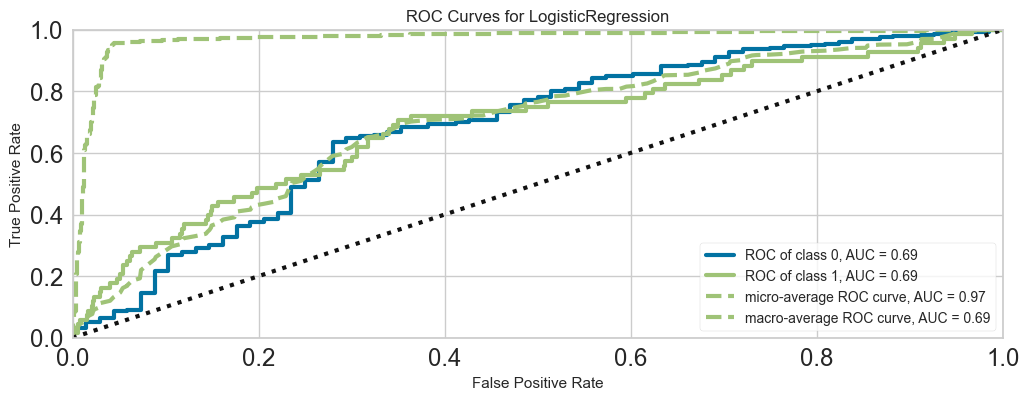

In [120]:
# Curva roc do modelo lr
plot_model(lr)

# Confusion matrix

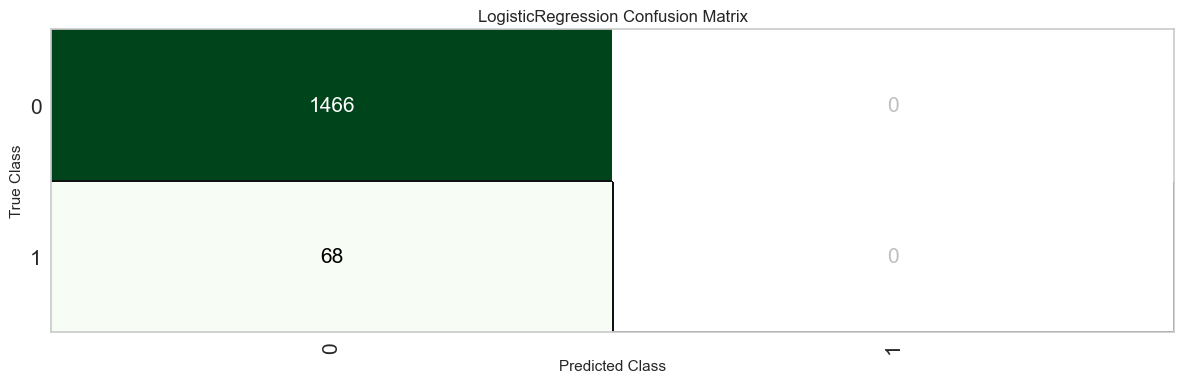

In [121]:
# plot lr - confusion matrix
plot_model(lr, plot = 'confusion_matrix')

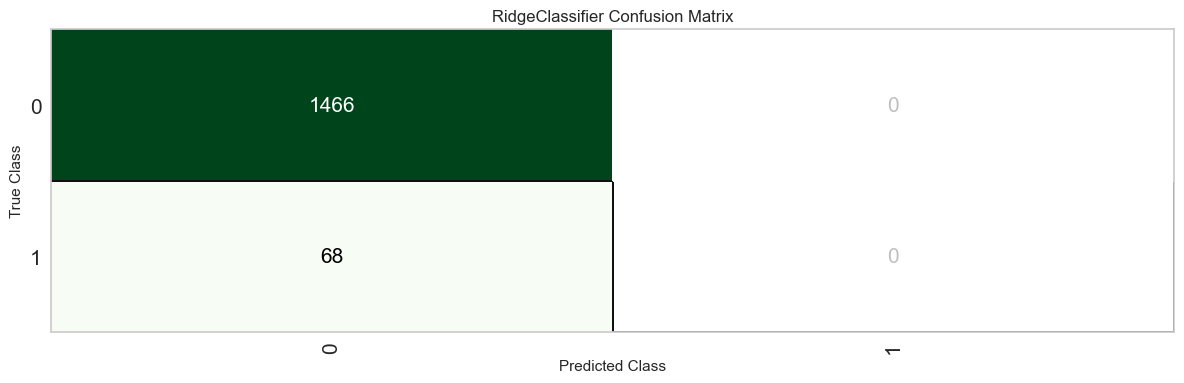

In [122]:
# plot ridge - confusion matrix
plot_model(ridge, plot = 'confusion_matrix')

# Class report dos modelos

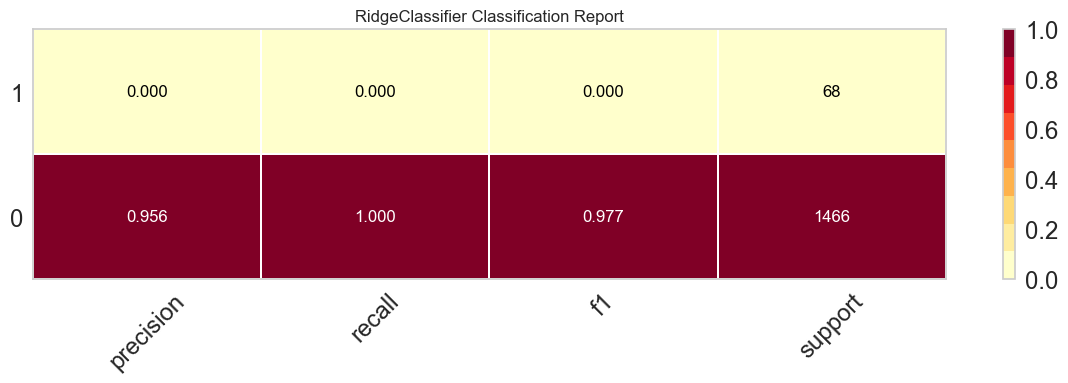

In [123]:
plot_model(ridge, plot = 'class_report')

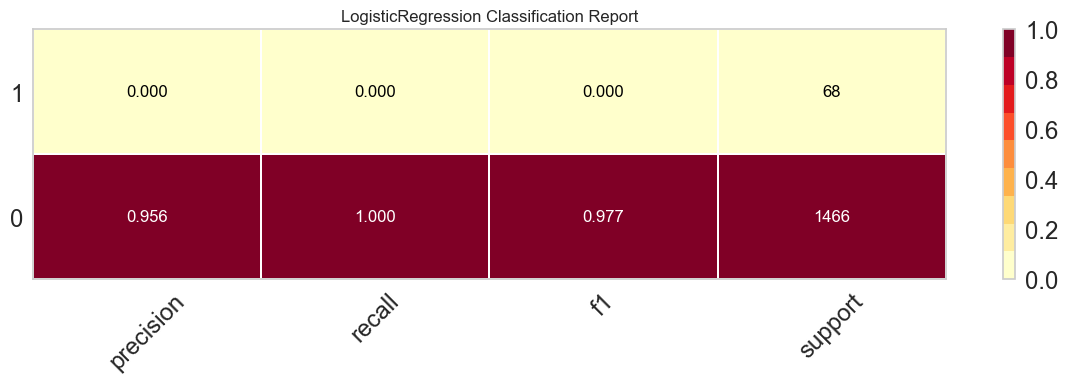

In [124]:
plot_model(lr, plot = 'class_report')

# Salvando modelo

In [125]:
save_model(lr, model_name='best-model_lr')
save_model(ridge, model_name='best-mode2_ridge')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='stroke',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('fix_perfect', Remove_100(target='stroke')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
         

# Referência

https://pycaret.org/

https://github.com/pycaret/pycaret

https://pycaret.readthedocs.io/en/latest/

https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763